In [251]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [256]:
ds = pd.read_csv('../data.csv')
ds.head()

,videoId,channelId,channelTitle,title,description,categoryId,publishedAt,currentTime,life,definition,...,longitude,publicStatsViewable,privacyStatus,license,embeddable,commentCount,viewCount,favoriteCount,dislikeCount,likeCount
0,bjBwri_QujU,UCVcb5c_-h5HxMZobDTCzBkg,Paul Tech,LG Stylo 2 Plus Full Review is it worth it?,So this is my full detailed review for the LG ...,28,1.467334e+09,1.491936e+09,24601996,hd,...,NaN,1.0,public,youtube,1.0,706.0,144986.0,0.0,33.0,2059.0
1,y2jAD9G_aLs,UCs0NBBFNnMoOMdB1D9ZEbkg,はうんどちゃんねる,【衝撃】 爆発したらヤバい！！ベテルギウス超新星爆発して2つ目の太陽に？既に存在するか？嘘の...,【衝撃】 爆発したらヤバい！！ベテルギウス超新星爆発して2つ目の太陽に？既に存在するか？嘘の...,28,1.467332e+09,1.491936e+09,24603955,hd,...,NaN,1.0,public,youtube,1.0,19.0,55829.0,0.0,32.0,73.0
2,KsjUUIOOCNE,UCkLJqy2fWYqBhPinnJjqXrA,newsmexico com mx,Iglesia presbiteriana pide diálogo magisterial...,Visita Newsmexico.com.mx La iglesia Presbiteri...,25,1.467332e+09,1.491936e+09,24603736,sd,...,NaN,1.0,public,youtube,1.0,0.0,625.0,0.0,0.0,11.0
3,Bjd0fQMpLLE,UCqhrVgL7_SumSLwmStIFQhw,Canal INEHRM,Conferencia congreso anfictiónico de Panamá en...,Por: Mario Vázquez Olivera\n\nVisita nuestras ...,27,1.467333e+09,1.491936e+09,24602542,sd,...,NaN,1.0,public,youtube,1.0,0.0,302.0,0.0,0.0,5.0
4,4V1w27m3dEw,UCi4sUjs8u1pat9GMgp3pNlQ,Hatim ali ali,Hatim,NaN,22,1.467334e+09,1.491936e+09,24601427,sd,...,NaN,1.0,public,youtube,1.0,0.0,11.0,0.0,0.0,1.0


In [257]:
del ds['videoId']
del ds['channelId']
del ds['channelTitle']
del ds['title']
del ds['publishedAt']
del ds['currentTime']
del ds['caption']
del ds['allowed']
del ds['recordingDate']
del ds['allowedCount']
del ds['publicStatsViewable']
del ds['favoriteCount']
del ds['privacyStatus']
del ds['dimension']
del ds['latitude']
del ds['longitude']

ds['description'] = ds['description'].apply(lambda x: len(str(x)))
ds.head()

,description,categoryId,life,definition,duration,durationCategory,licensedContent,license,embeddable,commentCount,viewCount,dislikeCount,likeCount
0,529,28,24601996,hd,592.0,medium,1.0,youtube,1.0,706.0,144986.0,33.0,2059.0
1,1159,28,24603955,hd,396.0,medium,1.0,youtube,1.0,19.0,55829.0,32.0,73.0
2,435,25,24603736,sd,174.0,medium,1.0,youtube,1.0,0.0,625.0,0.0,11.0
3,119,27,24602542,sd,4327.0,medium,0.0,youtube,1.0,0.0,302.0,0.0,5.0
4,3,22,24601427,sd,134.0,medium,0.0,youtube,1.0,0.0,11.0,0.0,1.0


In [258]:
ds = ds.dropna(subset=['likeCount'])

print ds['definition'].unique()
print ds['durationCategory'].unique()
print ds['license'].unique()

ds['life'] = ds['life'].astype('uint')
ds['life'] = ds['life'].apply(lambda x: x/(60*60*24*30))

ds['definition'] = ds['definition'].replace('sd', 0)
ds['definition'] = ds['definition'].replace('hd', 1)

ds['durationCategory'] = ds['durationCategory'].replace('long', 0)
ds['durationCategory'] = ds['durationCategory'].replace('medium', 1)

ds['license'] = ds['license'].replace('youtube', 0)
ds['license'] = ds['license'].replace('creativeCommon', 1)

print ds['definition'].unique()
print ds['durationCategory'].unique()
print ds['license'].unique()
print ds['life'].unique()

ds.head()

['hd' 'sd']
['medium' 'long']
['youtube' 'creativeCommon']
[1 0]
[1 0]
[0 1]
[9 8 7]


,description,categoryId,life,definition,duration,durationCategory,licensedContent,license,embeddable,commentCount,viewCount,dislikeCount,likeCount
0,529,28,9,1,592.0,1,1.0,0,1.0,706.0,144986.0,33.0,2059.0
1,1159,28,9,1,396.0,1,1.0,0,1.0,19.0,55829.0,32.0,73.0
2,435,25,9,0,174.0,1,1.0,0,1.0,0.0,625.0,0.0,11.0
3,119,27,9,0,4327.0,1,0.0,0,1.0,0.0,302.0,0.0,5.0
4,3,22,9,0,134.0,1,0.0,0,1.0,0.0,11.0,0.0,1.0


In [259]:
mean_Comm = ds['commentCount'].mean()
ds['commentCount'] = ds['commentCount'].fillna(int(mean_Comm))
ds['categoryId'] = ds['categoryId'].astype('uint8')
ds.describe()

,description,categoryId,life,definition,duration,durationCategory,licensedContent,license,embeddable,commentCount,viewCount,dislikeCount,likeCount
count,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9.257000e+03,9.257000e+03,9.257000e+03
mean,908.287566,20.602463,8.142811,0.778762,842.189154,0.883440,0.693961,0.011127,0.994059,1786.884304,2.941713e+06,1.372952e+03,1.851429e+04
std,1091.425982,7.087588,0.648714,0.415103,1990.531506,0.320913,0.460871,0.104900,0.076856,9851.617903,2.445102e+07,1.519124e+04,1.074621e+05
min,2.000000,1.000000,7.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,188.000000,20.000000,8.000000,1.000000,157.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.850000e+02,0.000000e+00,5.000000e+00
50%,543.000000,22.000000,8.000000,1.000000,285.000000,1.000000,1.000000,0.000000,1.000000,29.000000,2.183900e+04,1.100000e+01,1.430000e+02
75%,1217.000000,25.000000,9.000000,1.000000,657.000000,1.000000,1.000000,0.000000,1.000000,537.000000,6.203010e+05,2.740000e+02,4.506000e+03
max,10050.000000,43.000000,9.000000,1.000000,37643.000000,1.000000,1.000000,1.000000,1.000000,393480.000000,1.407446e+09,1.072142e+06,5.642247e+06


In [260]:
data = np.asarray([ds['description'], ds['categoryId'], ds['life'], ds['definition'], ds['duration'], ds['durationCategory'], ds['licensedContent'], ds['license'], ds['embeddable'], ds['commentCount'], ds['viewCount'], ds['dislikeCount']]).T

#data = (data-data.mean(axis=0))/data.std(axis=0)

#data[:] = np.log(data[:]+1)

ans = np.asarray(ds['likeCount']).T

In [262]:
X_train = data[:7000, :]
y_train = ans[:7000]

X_test = data[7000:, :]
y_test = ans[7000:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(7000, 12) (7000,)
(2257, 12) (2257,)


In [263]:
def dist(x1, x2):
    #return np.sqrt(((x1-x2)**2).sum())           #divide this distance by range to normalize things?
    return np.sqrt(0.5*((np.sqrt(x1) - np.sqrt(x2))**2).sum())

def knn(X_train, x, y_train, k=5):
    vals = []
    for ix in range(X_train.shape[0]):
        v = [dist(x, X_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x:x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = pred_arr[1]
    return pred_arr.mean(axis=0)
    

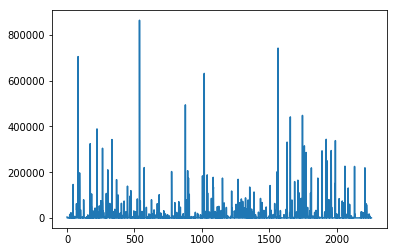

In [264]:
std = []
for ix in range(X_test.shape[0]):
    q = X_test[ix]
    res = knn(X_train, q, y_train, k=4)
    std.append(np.abs(res - y_test[ix]))

plt.figure(0)
plt.plot(std)
plt.show()

In [221]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 200
max_depth = 25
min_samples_split = 10

# Random forest classifier
clf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

/home/navjot/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/navjot/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/navjot/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  

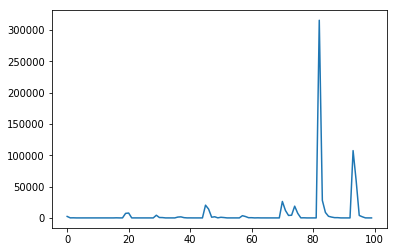

In [224]:
std = []
X_test.reshape(1, -1)
for ix in range(100):
    std.append(np.abs(y_test[ix] - clf.predict(X_test[ix])))
    
plt.figure(0)
plt.plot(std)
plt.show()